In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [ ]:
# Connect to SQLite database (it will create a new database file if it doesn't exist)
conn = sqlite3.connect('covid_data.db')

# Load the CSV files into SQLite tables
outcomes_df = pd.read_csv("covid_outcomes.csv")
hospitalizations_df = pd.read_csv("covid_hospitalizations.csv")
testing_df = pd.read_csv("covid_testing.csv")

# load data to SQL tables
outcomes_df.to_sql('covid_outcomes', conn, if_exists='replace', index=False)
hospitalizations_df.to_sql('covid_hospitalizations', conn, if_exists='replace', index=False)
testing_df.to_sql('covid_testing', conn, if_exists='replace', index=False)

470

# Retrieving All Records from the covid_outcomes Table

In [ ]:
pd.read_sql_query("SELECT * FROM covid_outcomes;", conn)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582
...,...,...,...,...,...,...
176143,10/01/2021,11/18/2020,21551,2483,163,41
176144,10/01/2021,03/17/2021,13961,1678,166,27
176145,10/01/2021,03/09/2020,401,89,36,19
176146,10/01/2021,09/10/2021,14573,503,38,0


# Retrieving All Records from the covid_hospitalizations Table

In [ ]:
pd.read_sql_query("SELECT * FROM covid_hospitalizations;", conn)

,date,ili_pne_admit,baseline,percent_change,status,ETLdate
0,03/01/2020 12:00:00 AM +0000,133,135.952381,-2.2,Insert,03/29/2021 11:27:03 AM +0000
1,03/02/2020 12:00:00 AM +0000,188,134.000000,40.3,Insert,03/29/2021 11:27:03 AM +0000
2,03/03/2020 12:00:00 AM +0000,174,133.809524,30.0,Insert,03/29/2021 11:27:03 AM +0000
3,03/04/2020 12:00:00 AM +0000,153,135.714286,12.7,Insert,03/29/2021 11:27:03 AM +0000
4,03/05/2020 12:00:00 AM +0000,152,134.142857,13.3,Insert,03/29/2021 11:27:03 AM +0000
...,...,...,...,...,...,...
465,05/26/2021 12:00:00 AM +0000,72,97.523810,-26.2,Insert,05/28/2021 11:00:05 AM +0000
466,05/28/2021 12:00:00 AM +0000,75,96.047619,-21.9,Insert,05/30/2021 11:00:04 AM +0000
467,06/01/2021 12:00:00 AM +0000,63,95.809524,-34.2,Insert,06/03/2021 11:00:08 AM +0000
468,06/10/2021 12:00:00 AM +0000,70,88.666667,-21.1,Insert,06/12/2021 11:00:06 AM +0000


# Retrieving All Records from the covid_testing Table

In [ ]:
pd.read_sql_query("SELECT * FROM covid_testing;", conn)

,date,total_test,positive_test,percent_positive,percent_positive_7days_agg,UptDate
0,05/22/2021 12:00:00 AM,20079,355,1.77,1.12,06/12/2021 11:30:11 PM
1,09/28/2020 12:00:00 AM,44355,543,1.22,1.51,03/17/2021 02:17:47 PM
2,03/05/2020 12:00:00 AM,65,4,6.15,NaN,03/17/2021 02:14:54 PM
3,09/23/2020 12:00:00 AM,46178,650,1.41,1.33,03/17/2021 02:17:46 PM
4,05/26/2020 12:00:00 AM,35719,1768,4.95,6.16,03/17/2021 02:17:35 PM
...,...,...,...,...,...,...
465,06/02/2020 12:00:00 AM,29419,922,3.13,NaN,03/17/2021 02:17:34 PM
466,06/25/2020 12:00:00 AM,30854,442,1.43,NaN,03/17/2021 02:17:34 PM
467,09/09/2020 12:00:00 AM,44423,435,0.98,1.08,03/17/2021 02:17:42 PM
468,12/02/2020 12:00:00 AM,77219,3630,4.70,5.61,03/17/2021 04:46:08 PM


# Date (primary key) Conversion and Merge

In [ ]:
# Remove 'extract_date' and 'UptDate' columns
outcomes_df.drop(columns=['extract_date', 'UptDate'], errors='ignore', inplace=True)
testing_df.drop(columns=['extract_date', 'UptDate'], errors='ignore', inplace=True)
hospitalizations_df.drop(columns=['extract_date', 'UptDate'], errors='ignore', inplace=True)

# Rename date-related columns to 'DATE'
if 'specimen_date' in outcomes_df.columns:
    outcomes_df.rename(columns={'specimen_date': 'DATE'}, inplace=True)

if 'date' in testing_df.columns:
    testing_df.rename(columns={'date': 'DATE'}, inplace=True)

if 'date' in hospitalizations_df.columns:
    hospitalizations_df.rename(columns={'date': 'DATE'}, inplace=True)

# Convert 'DATE' columns to datetime format
outcomes_df['DATE'] = pd.to_datetime(outcomes_df['DATE'], errors='coerce')
testing_df['DATE'] = pd.to_datetime(testing_df['DATE'], errors='coerce')
hospitalizations_df['DATE'] = pd.to_datetime(hospitalizations_df['DATE'], errors='coerce')

# Ensure both 'DATE' columns are naive without timezone before merging
hospitalizations_df['DATE'] = hospitalizations_df['DATE'].dt.tz_localize(None)
testing_df['DATE'] = testing_df['DATE'].dt.tz_localize(None)
outcomes_df['DATE'] = outcomes_df['DATE'].dt.tz_localize(None)

# Merge the outcomes and testing datasets on 'DATE'
merged_df = pd.merge(outcomes_df, testing_df, on='DATE', how='inner')

# Select only the relevant columns from hospitalizations_df
hospitalization_cols = hospitalizations_df[['DATE', 'ili_pne_admit', 'baseline', 'percent_change']]

# Merge selected columns from hospitalizations_df with merged_df on 'DATE'
merged_df = pd.merge(merged_df, hospitalization_cols, on='DATE', how='left')

merged_df.head()

<ipython-input-371-f638554283f2>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testing_df['DATE'] = pd.to_datetime(testing_df['DATE'], errors='coerce')
<ipython-input-371-f638554283f2>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hospitalizations_df['DATE'] = pd.to_datetime(hospitalizations_df['DATE'], errors='coerce')


,DATE,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,total_test,positive_test,percent_positive,percent_positive_7days_agg,ili_pne_admit,baseline,percent_change
0,2020-04-17,9979,3386,527,96,12268,4111,33.51,NaN,536,115.857143,362.6
1,2020-03-05,63,5,3,1,65,4,6.15,NaN,152,134.142857,13.3
2,2020-04-09,9019,4803,1253,386,10339,5467,52.88,NaN,816,129.000000,532.6
3,2020-04-03,9389,5523,1688,582,10406,5991,57.57,NaN,991,128.857143,669.1
4,2020-03-25,7457,4803,1395,429,8046,5094,63.31,NaN,1003,139.238095,620.3


# SQL Query 1: Aggregate monthly data for cases, hospitalizations, and deaths

In [ ]:
df = pd.DataFrame(merged_df)

# Convert 'DATE' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Connect to SQLite in-memory database
conn = sqlite3.connect(":memory:")
df.to_sql('merged_df', conn, if_exists='replace')

# SQL Query 1: Aggregate monthly data for cases, hospitalizations, and deaths
query1 = """
SELECT
    strftime('%Y-%m', DATE) AS month,
    SUM(Number_confirmed) AS total_cases,
    SUM(Number_hospitalized) AS total_hospitalizations,
    SUM(Number_deaths) AS total_deaths
FROM merged_df
GROUP BY month
ORDER BY month;
"""
monthly_data = pd.read_sql_query(query1, conn)
print("Monthly Aggregated Data:")
print(monthly_data)

Monthly Aggregated Data:
      month  total_cases  total_hospitalizations  total_deaths
0   2020-03     36498634                10998769       3922397
1   2020-04     59437292                15351130       6075223
2   2020-05     20595985                 2584370        741227
3   2020-06     11577931                 1393771        285363
4   2020-07     11491519                 1172972        197324
5   2020-08      9562310                  909881        143312
6   2020-09      9367084                  824930        154734
7   2020-10     10252869                  899525        162887
8   2020-11     14570967                 1120613        208109
9   2020-12     20336188                 1649236        325278
10  2021-01     21149582                 1771009        359846
11  2021-02     10615918                 1119862        216072
12  2021-03      8961414                  887230        142152
13  2021-04      4443065                  440259         64650
14  2021-05       927088      

# SQL Query 2: Filter data where positive test rate is above 50%

In [ ]:
# SQL Query 2: Filter data where positive test rate is above 50%
query2 = """
SELECT DATE, Number_tested, Number_confirmed, percent_positive
FROM merged_df
WHERE percent_positive > 50;
"""
high_positive_rate = pd.read_sql_query(query2, conn)
print("\nHigh Positive Rate Data:")
print(high_positive_rate)


High Positive Rate Data:
                      DATE  Number_tested  Number_confirmed  percent_positive
0      2020-04-09 00:00:00           9019              4803             52.88
1      2020-04-03 00:00:00           9389              5523             57.57
2      2020-03-25 00:00:00           7457              4803             63.31
3      2020-03-21 00:00:00           4713              2663             55.10
4      2020-03-20 00:00:00           7756              4121             51.12
...                    ...            ...               ...               ...
12165  2020-03-20 00:00:00           7808              4559             51.12
12166  2020-03-23 00:00:00           5661              3925             62.54
12167  2020-03-24 00:00:00           7210              4925             61.61
12168  2020-03-22 00:00:00           4421              2906             58.09
12169  2020-03-26 00:00:00           7318              5374             67.80

[12170 rows x 4 columns]


# SQL Query 3: Average hospitalization rate per month

In [ ]:
# SQL Query 3: Average hospitalization rate per month
query3 = """
SELECT
    strftime('%Y-%m', DATE) AS month,
    AVG(Number_hospitalized) AS avg_hospitalizations
FROM merged_df
GROUP BY month;
"""
avg_hospitalizations = pd.read_sql_query(query3, conn)
print("\nAverage Hospitalizations by Month:")
print(avg_hospitalizations)


Average Hospitalizations by Month:
      month  avg_hospitalizations
0   2020-03            666.955855
1   2020-04            990.651136
2   2020-05            171.536572
3   2020-06            102.010613
4   2020-07             89.030133
5   2020-08             74.494924
6   2020-09             75.391153
7   2020-10             86.617718
8   2020-11            122.578539
9   2020-12            191.883188
10  2021-01            225.204603
11  2021-02            177.953599
12  2021-03            146.142316
13  2021-04             88.565480
14  2021-05             27.354655
15  2021-06             13.074916


# SQL Query 4: Total cases and tests per day

In [ ]:
# SQL Query 4: Total cases and tests per day
query4 = """
SELECT DATE, Number_confirmed AS daily_cases, total_test AS daily_tests
FROM merged_df
ORDER BY DATE;
"""
daily_cases_tests = pd.read_sql_query(query4, conn)
print("\nDaily Cases and Tests Data:")
print(daily_cases_tests)


Daily Cases and Tests Data:
                       DATE  daily_cases  daily_tests
0       2020-03-01 00:00:00            0            2
1       2020-03-01 00:00:00            0            2
2       2020-03-01 00:00:00            0            2
3       2020-03-01 00:00:00            0            2
4       2020-03-01 00:00:00            1            2
...                     ...          ...          ...
156079  2021-06-13 00:00:00           80         9071
156080  2021-06-13 00:00:00           80         9071
156081  2021-06-13 00:00:00           81         9071
156082  2021-06-13 00:00:00           81         9071
156083  2021-06-13 00:00:00           81         9071

[156084 rows x 3 columns]


# SQL Query 5: Baseline Data Per Day

In [ ]:
# SQL Query 5: Baseline Data Per Day

query5 = """
SELECT DATE, baseline
FROM merged_df
ORDER BY DATE;
"""
baseline_data = pd.read_sql_query(query5, conn)
print("\nBaseline Data Per Day:")
print(baseline_data)


Baseline Data Per Day:
                       DATE    baseline
0       2020-03-01 00:00:00  135.952381
1       2020-03-01 00:00:00  135.952381
2       2020-03-01 00:00:00  135.952381
3       2020-03-01 00:00:00  135.952381
4       2020-03-01 00:00:00  135.952381
...                     ...         ...
156079  2021-06-13 00:00:00   87.761905
156080  2021-06-13 00:00:00   87.761905
156081  2021-06-13 00:00:00   87.761905
156082  2021-06-13 00:00:00   87.761905
156083  2021-06-13 00:00:00   87.761905

[156084 rows x 2 columns]


# SQL Query 6: Percentage Change Data Per Day

In [ ]:
# SQL Query 6: Percentage Change Data Per Day

query6 = """
SELECT DATE, percent_change
FROM merged_df
ORDER BY DATE;
"""
percent_change_data = pd.read_sql_query(query6, conn)
print("\nPercentage Change Data Per Day:")
print(percent_change_data)


Percentage Change Data Per Day:
                       DATE  percent_change
0       2020-03-01 00:00:00            -2.2
1       2020-03-01 00:00:00            -2.2
2       2020-03-01 00:00:00            -2.2
3       2020-03-01 00:00:00            -2.2
4       2020-03-01 00:00:00            -2.2
...                     ...             ...
156079  2021-06-13 00:00:00           -22.5
156080  2021-06-13 00:00:00           -22.5
156081  2021-06-13 00:00:00           -22.5
156082  2021-06-13 00:00:00           -22.5
156083  2021-06-13 00:00:00           -22.5

[156084 rows x 2 columns]


# Visualization

Plotting daily confirmed cases and hospitalizations

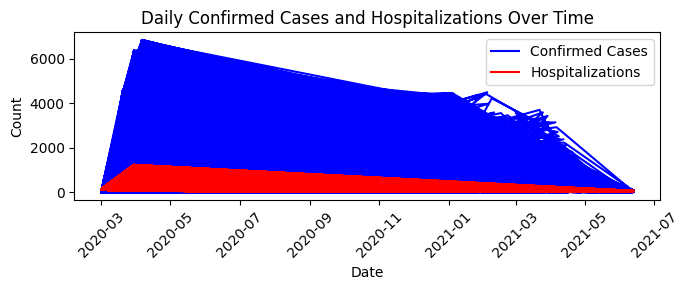

In [ ]:
# Plotting daily confirmed cases and hospitalizations
plt.figure(figsize=(7, 3))

# Plot daily confirmed cases
plt.plot(merged_df['DATE'], merged_df['Number_confirmed'], label='Confirmed Cases', color='blue')

# Plot daily hospitalizations
plt.plot(merged_df['DATE'], merged_df['ili_pne_admit'], label='Hospitalizations', color='red')

plt.title('Daily Confirmed Cases and Hospitalizations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

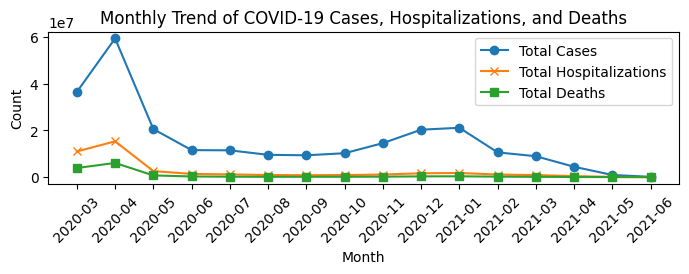

In [ ]:
# Plotting monthly total cases, hospitalizations, and deaths
plt.figure(figsize=(7, 3))
plt.plot(monthly_data['month'], monthly_data['total_cases'], label='Total Cases', marker='o')
plt.plot(monthly_data['month'], monthly_data['total_hospitalizations'], label='Total Hospitalizations', marker='x')
plt.plot(monthly_data['month'], monthly_data['total_deaths'], label='Total Deaths', marker='s')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Trend of COVID-19 Cases, Hospitalizations, and Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

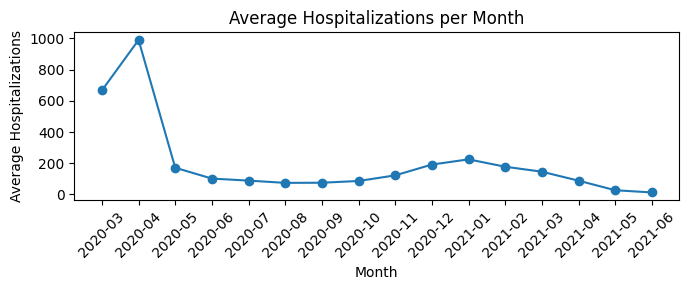

In [ ]:
# Plotting average hospitalizations per month
plt.figure(figsize=(7, 3))
plt.plot(avg_hospitalizations['month'], avg_hospitalizations['avg_hospitalizations'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Hospitalizations')
plt.title('Average Hospitalizations per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calculating positive rate

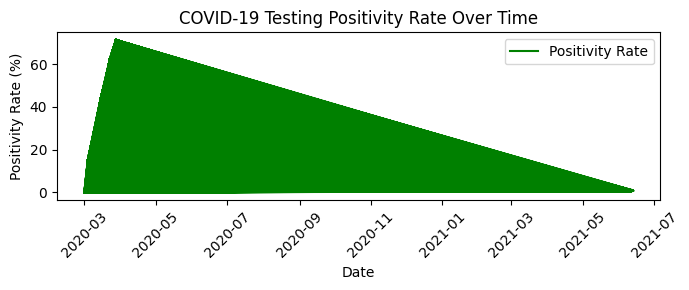

In [ ]:
# Calculating positive rate
merged_df['positivity_rate'] = (merged_df['positive_test'] / merged_df['total_test']) * 100

# Plot positive rate
plt.figure(figsize=(7, 3))
plt.plot(merged_df['DATE'], merged_df['positivity_rate'], label='Positivity Rate', color='green')

plt.title('COVID-19 Testing Positivity Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Positivity Rate (%)')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation

Calculate the correlation matrix

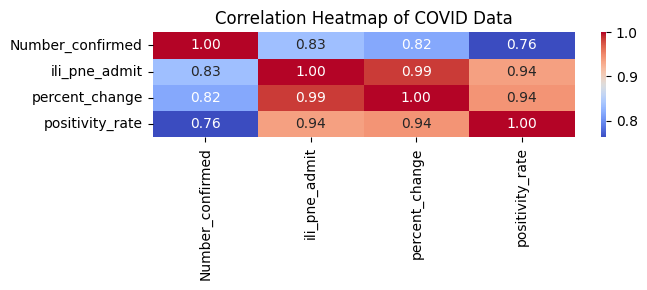

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['Number_confirmed', 'ili_pne_admit', 'percent_change', 'positivity_rate']].corr()

# Plot heatmap
plt.figure(figsize=(7, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Heatmap of COVID Data')
plt.tight_layout()
plt.show()

# Explaination

The code performs several operations on COVID-19 related datasets:

1. **Data Loading and Preprocessing:** It loads three CSV files (covid_outcomes.csv, covid_hospitalizations.csv, covid_testing.csv) into pandas DataFrames and then into an SQLite database. It cleans the data by dropping unnecessary columns and renaming/converting date columns to a uniform format. The datasets are then merged based on the 'DATE' column.

2. **SQL Queries:**  It executes several SQL queries on the merged data within an in-memory SQLite database:
    - Query 1: Aggregates monthly data for total cases, hospitalizations, and deaths.
    - Query 2: Filters data where the positive test rate is above 50%.
    - Query 3: Calculates the average hospitalization rate per month.
    - Query 4: Retrieves daily cases and tests.
    - Query 5: Retrieves baseline data per day.
    - Query 6: Retrieves percentage change data per day.

3. **Data Visualization:**
    - Plots daily confirmed cases and hospitalizations over time.
    - Plots the monthly trend of total cases, hospitalizations, and deaths.
    - Plots average hospitalizations per month.
    - Plots the COVID-19 testing positivity rate over time.

4. **Correlation Analysis:** Calculates and visualizes the correlation matrix among selected variables (confirmed cases, hospitalizations, percent change, and positivity rate) using a heatmap.

# Challenges

**1. Inconsistent Date Columns Across Datasets Challenge:**

Challenge: Each dataset had a different name for the date column: specimen_date in outcomes_df, date in testing_df and hospitalizations_df. This inconsistency made it difficult to merge the datasets directly.

Solution: The columns were renamed consistently to DATE, making it easier to work with the data across multiple DataFrames.

**2. Date Parsing Issues**

Challenge: Not all dates may have been in a recognizable format for pd.to_datetime(), leading to potential parsing errors and NaT (Not a Time) values.

Solution: The errors='coerce' parameter helped handle unparseable dates by setting them to NaT. Rows with NaT in the DATE column were later removed to maintain data consistency.